TE(1,1): k^2 = 1.35981488e-01
TE(2,1): k^2 = 2.17570381e-01
TE(3,1): k^2 = 3.53551869e-01
TE(1,2): k^2 = 4.62337060e-01
TE(4,1): k^2 = 5.43925953e-01
TE(2,2): k^2 = 5.43925953e-01
TE(3,2): k^2 = 6.79907441e-01
TE(5,1): k^2 = 7.88692631e-01


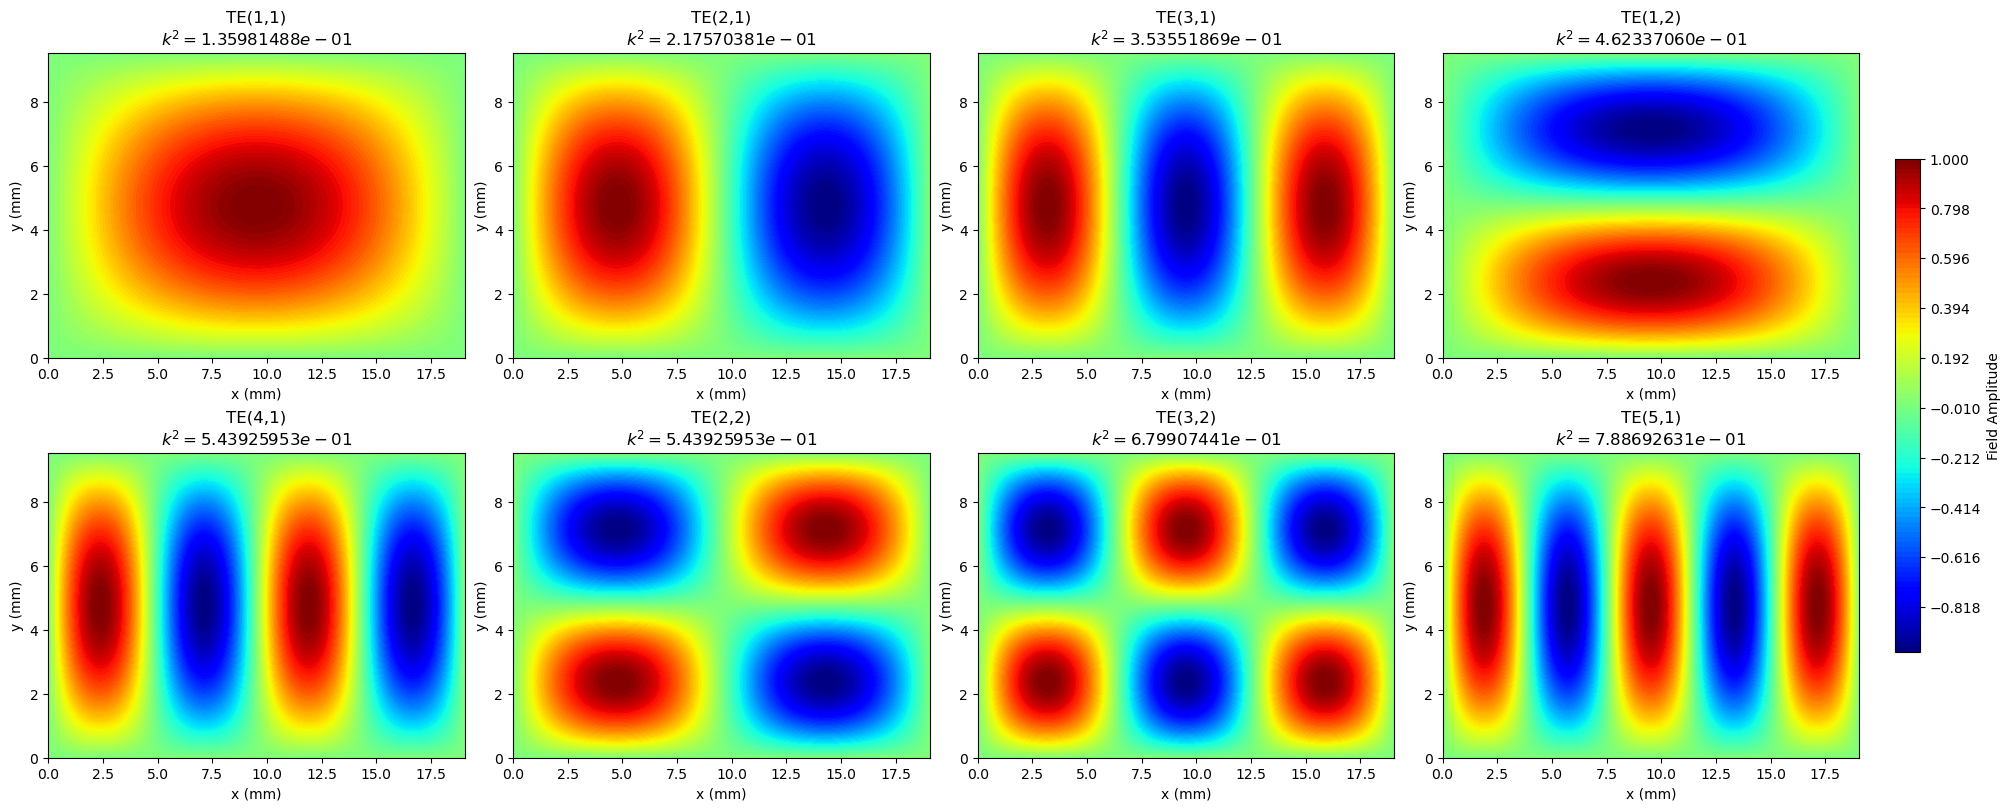

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 19.05  # Width in mm
b = 9.525  # Height in mm

mode_pairs = [(1, 1), (2, 1), (3, 1), (1, 2), (4, 1), (2, 2), (3, 2), (5, 1)]

Nx = 200
Ny = 200
x_vals = np.linspace(0, a, Nx)
y_vals = np.linspace(0, b, Ny)
X, Y = np.meshgrid(x_vals, y_vals, indexing='ij')

# Create a figure with 2 rows and 4 columns
fig, axs = plt.subplots(2, 4, figsize=(20, 8), constrained_layout=True)

# Use a fixed colormap range
vmin, vmax = -1, 1
levels = np.linspace(vmin, vmax, 100)  # more levels for smooth gradient

for idx_mode, (m, n) in enumerate(mode_pairs):
    row = idx_mode // 4
    col = idx_mode % 4
    ax = axs[row, col]

    Hz_analytic = np.sin(m * np.pi * X / a) * np.sin(n * np.pi * Y / b)
    k2_theoretical = (m * np.pi / a)**2 + (n * np.pi / b)**2
    print(f"TE({m},{n}): k^2 = {k2_theoretical:.8e}")

    cp = ax.contourf(X, Y, Hz_analytic, levels=levels, cmap='jet', vmin=vmin, vmax=vmax)
    ax.set_title(f"TE({m},{n})\n$k^2={k2_theoretical:.8e}$")
    ax.set_xlabel("x (mm)")
    ax.set_ylabel("y (mm)")

# Add one smooth colorbar to the right
cbar = fig.colorbar(cp, ax=axs.ravel().tolist(), orientation='vertical', shrink=0.7, aspect=20, pad=0.02)
cbar.set_label("Field Amplitude")
cbar.ax.tick_params(labelsize=10)  # optional: make ticks smaller

plt.show()